## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [3]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
num_mice

249

In [96]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. combined_data.drop_duplicates(['Mouse ID','Timepoint'])
duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [97]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"],keep ='first')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [99]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(combined_data["Mouse ID"].unique())
num_mice_cleaned

249

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean': mean,
                          'Median': median,
                          'Variance': variance,
                          'Standard Dev.': stdv,
                          'SEM': SEM})


summary_df



,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [102]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


In [6]:
#create new data frame & remove duplicates for Mouse ID and Drug Regiment

clean_df = combined_data.drop_duplicates(subset=["Mouse ID","Drug Regimen","Timepoint"],keep ='first')
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


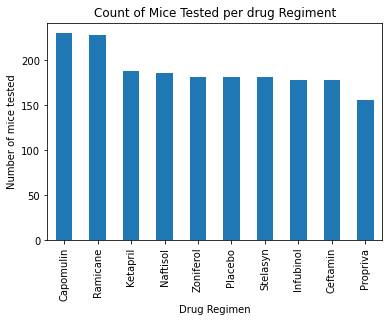

In [104]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

barplt = pd.value_counts(clean_df['Drug Regimen'])
barplt.plot(kind='bar')
plt.title("Count of Mice Tested per drug Regiment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()

In [105]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_group = clean_df.groupby('Drug Regimen')
count_regimen = regimen_group['Drug Regimen'].count()
count_regimen


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

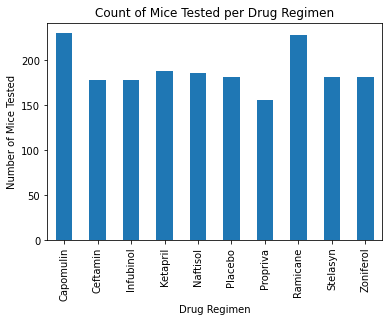

<Figure size 432x288 with 0 Axes>

In [106]:
regimen_chart = count_regimen.plot(kind='bar')

regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Mice Tested")
plt.title("Count of Mice Tested per Drug Regimen")

plt.show()
plt.tight_layout()

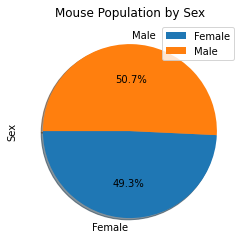

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

clean_df.groupby('Sex').size().plot(kind='pie', legend=True, autopct="%1.1f%%", shadow = True, startangle=180)
plt.ylabel('Sex')
plt.title("Mouse Population by Sex")
plt.show()

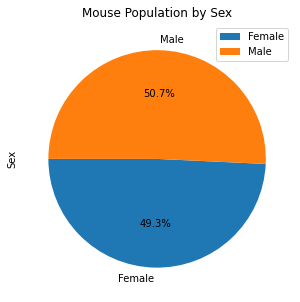

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

bygender = clean_df.groupby("Sex").count()
secondpie = bygender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180, legend='true')
plt.title('Mouse Population by Sex')
plt.ylabel('Sex')

plt.savefig('piechart2')
plt.show()

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [26]:

#create datafrme for each of the best drugs. Need to figure how to do in one step to make cleaner
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceft_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [27]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [28]:
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [29]:
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [30]:
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [35]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

cap_tumor = caplastmerge['Tumor Volume (mm3)']
quartiles = cap_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor treated with Capomulin is: {lowerq}")
print(f"The upper quartile of tumor treated with Capomulin is: {upperq}")
print(f"The interquartile range of tumor treated with Capomulin is: {iqr}")
print(f"The the median of tumor treated with Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor treated with Capomulin is: 32.37735684
The upper quartile of tumor treated with Capomulin is: 40.1592203
The interquartile range of tumor treated with Capomulin is: 7.781863460000004
The the median of tumor treated with Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [36]:
ram_tumor = ramlastmerge['Tumor Volume (mm3)']
quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor treated with Ramicane is: {lowerq}")
print(f"The upper quartile of tumor treated with Ramicane is: {upperq}")
print(f"The interquartile range of tumor treated with Ramicane is: {iqr}")
print(f"The the median of tumor treated with Ramicane is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor treated with Ramicane is: 31.56046955
The upper quartile of tumor treated with Ramicane is: 40.65900627
The interquartile range of tumor treated with Ramicane is: 9.098536719999998
The the median of tumor treated with Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [37]:
inf_tumor = inflastmerge['Tumor Volume (mm3)']
quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor treated with Infubinol is: {lowerq}")
print(f"The upper quartile of tumor treated with Infubinol is: {upperq}")
print(f"The interquartile range of tumor treated with Infubinol is: {iqr}")
print(f"The the median of tumor treated with Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor treated with Infubinol is: 54.04860769
The upper quartile of tumor treated with Infubinol is: 65.52574285
The interquartile range of tumor treated with Infubinol is: 11.477135160000003
The the median of tumor treated with Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [38]:
ceft_tumor = ceftlastmerge['Tumor Volume (mm3)']
quartiles = ceft_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor treated with Ceftamin is: {lowerq}")
print(f"The upper quartile of tumor treated with Ceftamin is: {upperq}")
print(f"The interquartile range of tumor treated with Ceftamin is: {iqr}")
print(f"The the median of tumor treated with Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor treated with Ceftamin is: 48.72207785
The upper quartile of tumor treated with Ceftamin is: 64.29983003
The interquartile range of tumor treated with Ceftamin is: 15.577752179999997
The the median of tumor treated with Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [119]:
 # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

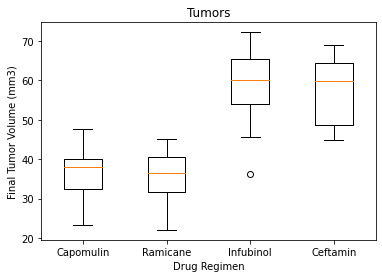

In [120]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [cap_tumor, ram_tumor, inf_tumor, ceft_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [121]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [122]:
line_plt = cap_df.loc[cap_df['Mouse ID']== 's185',:]
line_plt

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


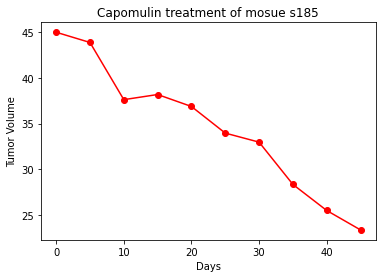

In [123]:
time = line_plt['Timepoint']
tumor = line_plt['Tumor Volume (mm3)']


plt.plot(time,tumor, color = 'red', marker = 'o', label = ())

plt.title('Capomulin treatment of mosue s185')
plt.xlabel('Days')
plt.ylabel('Tumor Volume')

plt.savefig('linechart')
plt.show()


In [124]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg_df = cap_df.groupby(['Mouse ID']).mean()
cap_avg_df.head (2)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0


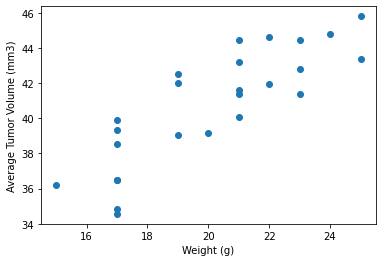

In [40]:
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [48]:
weight = capavg['Weight (g)']
tumor = capavg['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
